Data 300: Statistical Machine Learning

Sam Campbell

Homework 3- Classification

This is a programming only assignment.

Due: Thursday 26th at the end of class.

For this assignment you are going to be fitting and evaluating two classification models following the machine learning workflow we discussed in class.

Logistic Regression – Binary Classification. For the first task, you are required to fit a logistic regression model on a finance dataset (see here on course website) . Financial institutions that lend to consumers rely on models to help decide on who to approve or decline for credit (for lending products such as credit cards, automobile loans, or home loans). In this task, you are to develop a logistic regression model that reviews credit card applications to determine which ones should be approved. You are given historical data containing one response (binary) and 20 predictor variables from credit card accounts for a hypothetical bank XYZ. (see a description of the data here )

Remember to think through the machine learning workflow we discussed in class and use the appropriate modules and packages to analyze the data and to fit and evaluate the model. Answer all the questions in code and writing.

1. Do some Exploratory Data Analysis (EDA) on the data and report what you find. Spend some time understanding the data before you fit the model. (10 points)

a. Which variables contain missing values? How would you go about dealing with these missing values? Pick one method for dealing with missing values so that in the remainder of the assignment, you are working with data that has no missing values.

b. Which education level is underrepresented in the data?

c. Are the classes balanced in the data set?

d. How would you describe the distribution of “rep_income”? Is it skewed or approximately normal?

e. Group default status (“Def_Ind”) by education level (“rep_education”). Which education level is more likely to default on loans?

f. Does anything else stand out? Multicollinearity?

2. Separate your data into training and testing sets. You can do this by hand or use the “train_test_split” function from Sklearn. (2 points)

3. Fit the model, report, and interpret the accuracy, precision, and recall of the model (5 points)

4. Produce a confusion matrix and interpret it (5 points)

5. Plot a ROC/AUC curve (2 points)

6. Which features in the data are the most important for predicting default status (“Def_Ind”) (2 points)

Linear Discriminant Analysis (LDA) – Multiclass Classification.

In this problem you are required to predict one of four price categories for a mobile phone device based on its features. The dependent variable is “price_range”. The data set for this task is on the course website (here)

Again, think about the machine learning workflow and the modules and packages you will need to analyze the data, to fit and to evaluate the model.

1. Conduct some EDA report your findings (5 marks)

2. Separate your data into training and testing sets. You can do this by hand or use the “train_test_split” function from Sklearn. (2 points)

3. Fit the LDA model. (2 points)

4. Report and interpret the accuracy, precision and recall (5 marks)

5. Produce a confusion matrix and interpret it. (4 marks)

In [1]:
import pandas as pd# v 1.5.3
import numpy as np # v 1.21.5
import sklearn as sk # v 1.3.2
import seaborn as sns # 0.13.0
import matplotlib.pyplot as plt # 3.6.3

from sklearn.linear_model import LogisticRegression # v 1.3.2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # v 1.3.2
from sklearn.metrics import precision_score, recall_score, accuracy_score # v 1.3.2
from sklearn.model_selection import train_test_split # v 1.3.2
from sklearn.metrics import confusion_matrix # v 1.3.2
from sklearn.metrics import roc_curve, roc_auc_score # v 1.3.2
import statsmodels.api as sm # v 0.13.5


from sklearn.preprocessing import LabelEncoder # v 1.3.2

In [2]:
df = pd.read_csv('/Users/samcampbell/Downloads/loan_default_data_set.csv')

In [3]:
df.shape, df.columns, df.dtypes #Checking out the shape of the df, columns, and data types

((20000, 21),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [4]:
df.head() #looking at the first 5 rows

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [5]:
df.tail() #Looking at the last 5 rows

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,NaN,high_school,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,NaN,1,NaN,high_school,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,NaN,0,157706.15810,college,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.97414,college,1
19999,107338.82070,7942.952546,325,195,302,0,0,0,0.000000,0,...,0,0,0.358067,0.435511,0.349246,NaN,0,165447.16380,college,0


In [6]:
df.describe() #checking out some basic metrics

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,18042.000000,20000.000000,18441.000000,20000.000000
mean,107439.032714,12230.735330,280.710050,146.100300,285.12085,0.156550,0.029700,0.030000,352.496791,0.616050,1.053050,0.272950,0.164150,0.490867,0.484157,0.465007,0.550964,0.250000,166373.900129,0.100000
std,22365.573172,3060.432745,73.238059,38.603134,64.25718,0.469524,0.176407,0.170591,1784.459199,1.158533,2.035766,0.487094,0.376977,0.129604,0.122891,0.130913,0.128403,0.433024,33444.974846,0.300008
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000
25%,92212.563362,10151.128043,231.000000,120.000000,242.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403926,0.401141,0.377850,0.464195,0.000000,143504.239600,0.000000
50%,107711.034250,12238.862545,280.000000,146.000000,285.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490365,0.485525,0.464847,0.551765,0.000000,166462.899700,0.000000
75%,122751.428100,14286.417122,330.000000,172.000000,330.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.578311,0.567996,0.553581,0.638316,0.250000,188903.520800,0.000000
max,200000.000000,25000.000000,560.000000,300.000000,550.00000,5.000000,2.000000,1.000000,35000.000000,10.000000,18.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.000000


a. Which variables contain missing values? How would you go about dealing with these missing values? Pick one method for dealing with missing values so that in the remainder of the assignment, you are working with data that has no missing values.

In [7]:
df.isna().sum()

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

It appears that there are missing values for the "pct_card_over_50_uti", "rep_income", and "rep_education" variables. I'm electing to drop all the rows with missing values using the dropna() function below.

In [8]:
DroppedNaDf = df.dropna()

In [9]:
DroppedNaDf.describe() #checking out some summary statistics for my new dataframe

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,num_card_inq_24_month,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind
count,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000,16653.000000
mean,107503.368850,12225.912700,280.868432,146.150363,285.369963,0.157869,0.029364,0.029905,354.185706,0.613283,1.043896,0.272263,0.164955,0.491365,0.484227,0.465262,0.551126,0.248664,166504.201974,0.101904
std,22428.725218,3063.503275,73.325265,38.620062,64.394445,0.472773,0.175800,0.170329,1792.897533,1.152850,2.024040,0.486644,0.378045,0.129201,0.123128,0.130412,0.128454,0.432252,33378.119222,0.302531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000
25%,92141.840000,10134.516770,231.000000,120.000000,242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404825,0.401141,0.377750,0.464346,0.000000,143750.510000,0.000000
50%,107739.626900,12236.871810,281.000000,146.000000,285.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490907,0.485526,0.464857,0.551771,0.000000,166630.268800,0.000000
75%,122931.803300,14296.918800,330.000000,172.000000,330.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.578276,0.567882,0.554130,0.638381,0.000000,189020.132400,0.000000
max,200000.000000,25000.000000,550.000000,300.000000,550.000000,5.000000,2.000000,1.000000,35000.000000,10.000000,18.000000,3.000000,2.000000,1.000000,0.929435,1.000000,1.000000,1.000000,300000.000000,1.000000


In [10]:
DroppedNaDf.shape # checking out the shape of my new dataframe, lost a good portion of observations

(16653, 21)

b. Which education level is underrepresented in the data?

It appears that the other and also potentially the graduate education levels are underrepresented in the dataset.

In [11]:
DroppedNaDf.rep_education.value_counts()

college        10104
high_school     4403
graduate        2026
other            120
Name: rep_education, dtype: int64

c. Are the classes balanced in the data set?

It does appear that the classes are inbalanced. Below you can see that the number of defaults in the dataset is 1697 and the number of non-defaults is 14956.

In [12]:
DroppedNaDf.Def_ind.value_counts()

0    14956
1     1697
Name: Def_ind, dtype: int64

d. How would you describe the distribution of “rep_income”? Is it skewed or approximately normal? 

The distribution appears approximately normal for "rep_income". The mean is about the same as the mode (166504 and 166630).

In [13]:
DroppedNaDf.rep_income.describe()

count     16653.000000
mean     166504.201974
std       33378.119222
min       20000.000000
25%      143750.510000
50%      166630.268800
75%      189020.132400
max      300000.000000
Name: rep_income, dtype: float64

e. Group default status (“Def_Ind”) by education level (“rep_education”). Which education level is more likely to default on loans?

It appears that the default rate for those with only a highschool education is the highest. This can be seen in the print out two cells down.

In [14]:
print(DroppedNaDf.groupby('rep_education')['Def_ind'].sum())

rep_education
college        1000
graduate        168
high_school     520
other             9
Name: Def_ind, dtype: int64


In [15]:
hsRate = 520/4403
gradRate = 168/2026
collegeRate = 1000/10104
otherRate=9/120

print('High School Default Rate is: ' , hsRate)
print('Graduate School Default Rate is: ' , gradRate)
print('College Default Rate is: ' , collegeRate)
print('Other School Default Rate is: ' , otherRate)

High School Default Rate is:  0.1181012945718828
Graduate School Default Rate is:  0.08292201382033564
College Default Rate is:  0.09897070467141726
Other School Default Rate is:  0.075


Turning my rep_education variable into a dummy numerical variable to check for multicolinearity and to run the regression. I plot the matrix to easier check for correlations amongst my variables. 

In [16]:
df_with_dummies = pd.get_dummies(DroppedNaDf, columns= ['rep_education'])

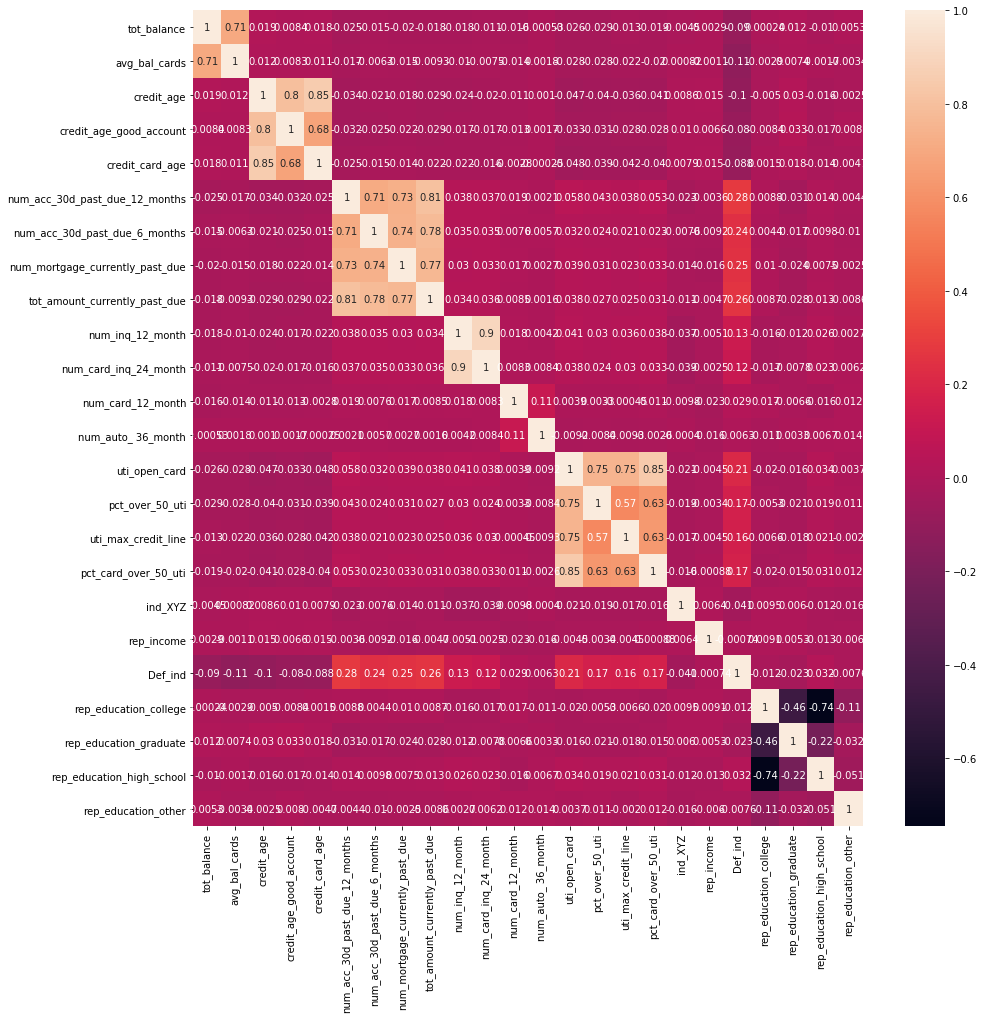

In [17]:
plt.figure(figsize=(15, 15)) 
sns.heatmap(df_with_dummies.corr(), annot=True)
plt.show()

There does seem to be some multicolinearity which is outlined in the heatmap above. The variables which are correlarted (either positively or negativly) make sense intuitively. For instance the correlation between "tot_balance" and "avg_bal_cards" is positively correlated (.71). I would expect someone with a higher amount of credit across the board (mortgage, auto, credit cards) to also be associted with a higher average credit card balance. 

Separate your data into training and testing sets. You can do this by hand or use the “train_test_split” function from Sklearn. (2 points)

In [18]:
Y= df_with_dummies.Def_ind

X = df_with_dummies.loc[:, df_with_dummies.columns != "Def_ind"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

In [20]:
reg = LogisticRegression()

Fit the model, report, and interpret the accuracy, precision, and recall of the model (5 points)

In [21]:
reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
Y_pred = reg.predict(X_test)

In [23]:
print(reg.intercept_, reg.coef_, reg.score(X_test, Y_test)) 

#r-squared .9 , fairly good fit


[-1.11629975e-06] [[-9.53631393e-07 -1.03554869e-04 -2.33261357e-03 -1.04067631e-03
  -1.85439982e-03  1.01869064e-05  2.39261312e-06  2.00737182e-06
   2.59558304e-04  3.88197278e-05  6.22812554e-05  3.07413249e-06
   2.83019801e-07  6.48767000e-06  4.81535568e-06  4.93733411e-06
   5.28508762e-06 -4.96094912e-06  1.64391950e-06 -1.88271558e-06
  -1.66961301e-06  2.62590548e-06 -1.89876634e-07]] 0.9046589817483189


In [24]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average = 'macro')
recall = recall_score(Y_test, Y_pred, average = 'macro')
print('Accuracy score: ',accuracy)
print('Precision score: ',precision)
print('Recall score: ',recall)

Accuracy score:  0.9046589817483189
Precision score:  0.7959645278279702
Recall score:  0.5442481549697669


It looks like my Accuracy and Precision Scores are pretty good around .9 and .8 means the model is pretty precise and accurate at predicting on our test set. The recall score however isn't great, I'm thinking this is also due to the nature of our inbalanced dataset.

Produce a confusion matrix and interpret it (5 points)

In [25]:
ConfusionMatrix = confusion_matrix(Y_test,Y_pred)

In [26]:
print(ConfusionMatrix)

[[3728   18]
 [ 379   39]]


The amount of True Negatives are the highest which is pleasing to see. However the False Negatives are the second highest, this could be partly due to the inbalances of default classes in our dataset. This is maybe how we want our model to be biased though from a risk perspective. If I were a bank I'd want to be risk adverse and maybe falsely predicting default will lower profits but it could also save from a blowup if a lot of people default.

Plot a ROC/AUC curve (2 points)

In [27]:
y_pred_prob = reg.predict_proba(X_test)[:, 1]

In [28]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

In [29]:
auc = roc_auc_score(Y_test, y_pred_prob)

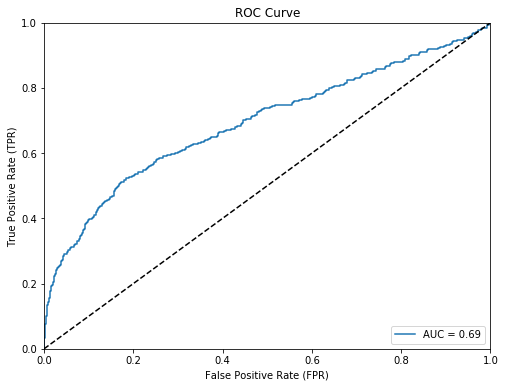

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Which features in the data are the most important for predicting default status (“Def_Ind”) (2 points)

It appears two of the most important features for prediciting default status are a persons total credit balance across the board and a persons credit utilization rate. These both make intuitive sense to me, in general the total balance measure the aggregate amount of credit someone has and the utilization rate measures the ratio of credit owed and ones credit limit. Overall the more credit someone has and that credit balance relative to their credit limit seem like good predictive variables towards default risk. If something goes wrong in someones life and they have more credit, it will make paying back that credit even harder.

In [31]:
df2 = pd.read_csv('/Users/samcampbell/Downloads/mobile_phone_prices.csv')

In [32]:
df2.shape, df2.columns, df2.dtypes # dependent variable is already numerically encoded.

((2000, 21),
 Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
        'four_g', 'int_memory', 'mobile_depth', 'mobile_weight',
        'number_of cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
        'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 battery_power        int64
 bluetooth            int64
 clock_speed        float64
 dual_sim             int64
 front_camera         int64
 four_g               int64
 int_memory           int64
 mobile_depth       float64
 mobile_weight        int64
 number_of cores      int64
 pc                   int64
 px_height            int64
 px_width             int64
 ram                  int64
 sc_h                 int64
 sc_w                 int64
 talk_time            int64
 three_g              int64
 touch_screen         int64
 wifi                 int64
 price_range          int64
 dtype: object)

In [33]:
df2.head() #Checking out the first 5 rows

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
df2.tail() #Looking at the last 5 rows

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [35]:
df2.isna().sum() # No missing variables, good!

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [36]:
df2.describe() # Looking at basic summary statistics

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [37]:
df2.price_range.value_counts() #balanced classes as well, good!

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [38]:
Y2 = df2.price_range

X2 = df2.loc[:, df2.columns != "price_range"]

#assigning variables

Separate your data into training and testing sets. You can do this by hand or use the “train_test_split” function from Sklearn. (2 points)

In [39]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=5)

In [40]:
#creating and fitting my model below
LDA_Model = LinearDiscriminantAnalysis()

In [41]:
LDA_Model.fit(X2_train,Y2_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [42]:
print(LDA_Model.intercept_, LDA_Model.coef_, LDA_Model.score(X2_test, Y2_test))

#r-squared .94 seems like a pretty good fit...

[ 34.54078374  11.03021169 -16.03920504 -57.74319009] [[-7.79476003e-03 -1.19582612e-01  2.70135642e-01  1.35336928e-01
  -5.22442404e-02  9.18036347e-02 -6.41880257e-03 -5.83031528e-01
   1.39505392e-02  6.06368290e-03  4.57866907e-02 -4.42983708e-03
  -4.10995574e-03 -1.41935854e-02 -2.92320092e-02 -1.78055620e-03
  -1.42528517e-02 -5.15016202e-01 -1.34945068e-02  2.99980532e-01]
 [-2.06122232e-03 -2.61406381e-02  9.16754350e-03  1.42417656e-01
  -2.92559527e-03  1.54064193e-02 -3.39195510e-03  1.77802069e-01
   4.37291381e-03 -5.04843170e-02  3.86616730e-03 -1.09645153e-03
  -1.15578383e-03 -4.26814820e-03 -1.04579549e-02 -2.52829508e-05
   7.82029592e-03 -1.91051263e-01  5.91870892e-02  1.75857557e-01]
 [ 2.12226418e-03  2.66920857e-02 -8.06242278e-02 -1.24293310e-01
   2.69624980e-02 -1.73614700e-01 -1.29552025e-03 -1.77577734e-02
  -6.02896091e-04  3.95449520e-02 -1.79304602e-02  1.19041301e-03
   1.08805420e-03  4.34025240e-03 -8.26530113e-03  1.12577347e-02
  -1.26990612e-02  3

In [43]:
Y2_Pred = LDA_Model.predict(X2_test)

In [44]:
accuracy = accuracy_score(Y2_test, Y2_Pred)
precision = precision_score(Y2_test, Y2_Pred, average='macro')
recall = recall_score(Y2_test, Y2_Pred, average = 'macro')
print('Accuracy score: ',accuracy)
print('Precision score: ',precision)
print('Recall score: ',recall)

Accuracy score:  0.9466666666666667
Precision score:  0.9477898786852996
Recall score:  0.9465731747078754


All of these metrics look pretty good actually, all above .9 it looks like a better predictive model than my logistic regression from part 1, especially the recall score.

Produce a confusion matrix and interpret it. (4 marks)

In [45]:
ConfusionMatrixLDA = confusion_matrix(Y2_test,Y2_Pred)

In [46]:
print(ConfusionMatrixLDA)

[[148   4   0   0]
 [  2 142   4   0]
 [  0  12 136   1]
 [  0   0   9 142]]


This Confusion matrix again confirms that this model is predicting better than my logistic regression above the true positive (diagonal line from left to right) far out weighhs the false positives for those classes. 